In [53]:
import casadi as ca

x = ca.SX.sym('x')
obj =  x**2 - 6*x + 13

# optimization constraints
g = []
p = []

OPT_VARIABLES = x
nlprob = {'f': obj, 'x': OPT_VARIABLES, 'g': g, 'p': p}

In [54]:
opts = {
    'ipopt': {
        'max_iter': 1000,
        'print_level': 0,
        'acceptable_tol': 1e-8,
        'acceptable_obj_change_tol': 1e-6
    },
    'print_time': 0
}

solver = ca.nlpsol('solver', 'ipopt', nlprob, opts)

In [55]:
ubx = ca.DM.zeros((1, 1))
lbx = ca.DM.zeros((1, 1))
lbg = ca.DM.zeros((1, 1))
ubg = ca.DM.zeros((1, 1))

lbx[0] = -ca.inf
ubx[0] = ca.inf
lbg[0] = -ca.inf
ubg[0] = ca.inf

p = []
x0 = -0.5

sol = solver(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

3
4


In [56]:
x = ca.SX.sym('x')
obj =  ca.exp(0.2*x)*ca.sin(x)

# optimization constraints
g = []
p = []

OPT_variables = x
nlprob = {'f': obj, 'x': OPT_variables, 'g': g, 'p': p}

opts = {
    'ipopt': {
        'max_iter': 1000,
        'print_level': 0,
        'acceptable_tol': 1e-8,
        'acceptable_obj_change_tol': 1e-6
    },
    'print_time': 0
}

solver = ca.nlpsol('solver', 'ipopt', nlprob, opts)

ubx = ca.DM.zeros((1, 1))
lbx = ca.DM.zeros((1, 1))
lbg = ca.DM.zeros((1, 1))
ubg = ca.DM.zeros((1, 1))

lbx[0] = 0
ubx[0] = 4*ca.pi
lbg[0] = -ca.inf
ubg[0] = ca.inf

p = []

x0 = 0
print("x0= ", x0)
sol = solver(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

x0 = 4
print("\r\nx0= ", x0)
sol = solver(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

x0 = 10
print("\r\nx0= ", x0)
sol = solver(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

x0=  0
-7.4924e-09
-7.4924e-09

x0=  4
4.90978
-2.61783

x0=  10
11.193
-9.19798


# linear regression

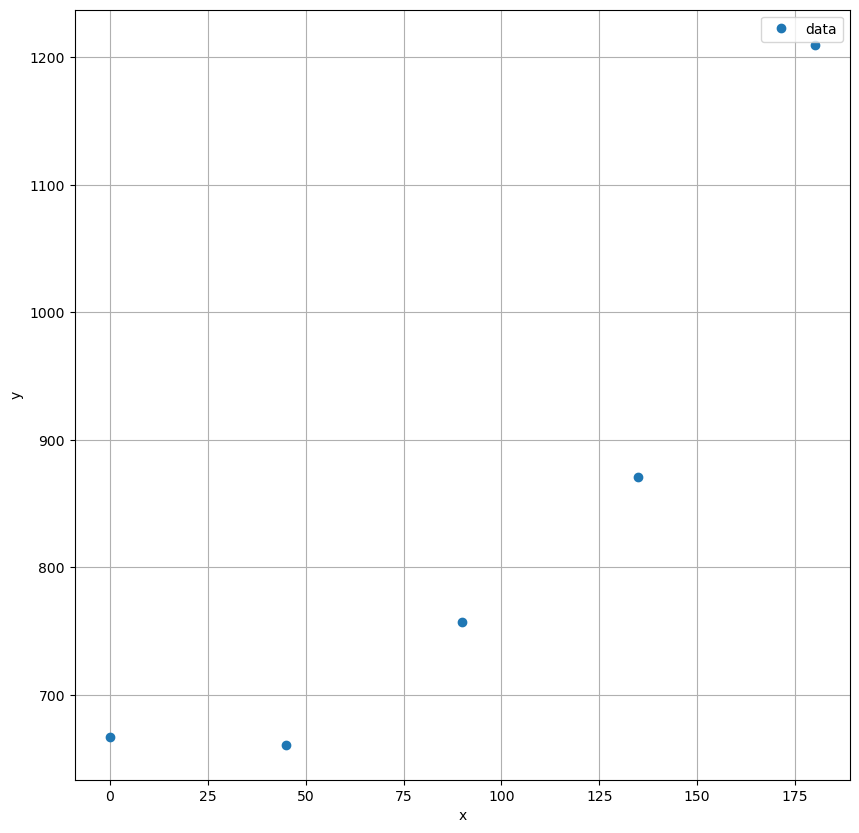

In [57]:
import matplotlib.pyplot as plt
import casadi as ca
%matplotlib inline

x = [0,45,90,135,180]
y = [667,661,757,871,1210]

line_width = 1.5

plt.figure()
plt.plot(x,y,'o',label='data',linewidth=line_width)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

[[2.88, 574]]
38527.2


Text(0.5, 0, 'x')

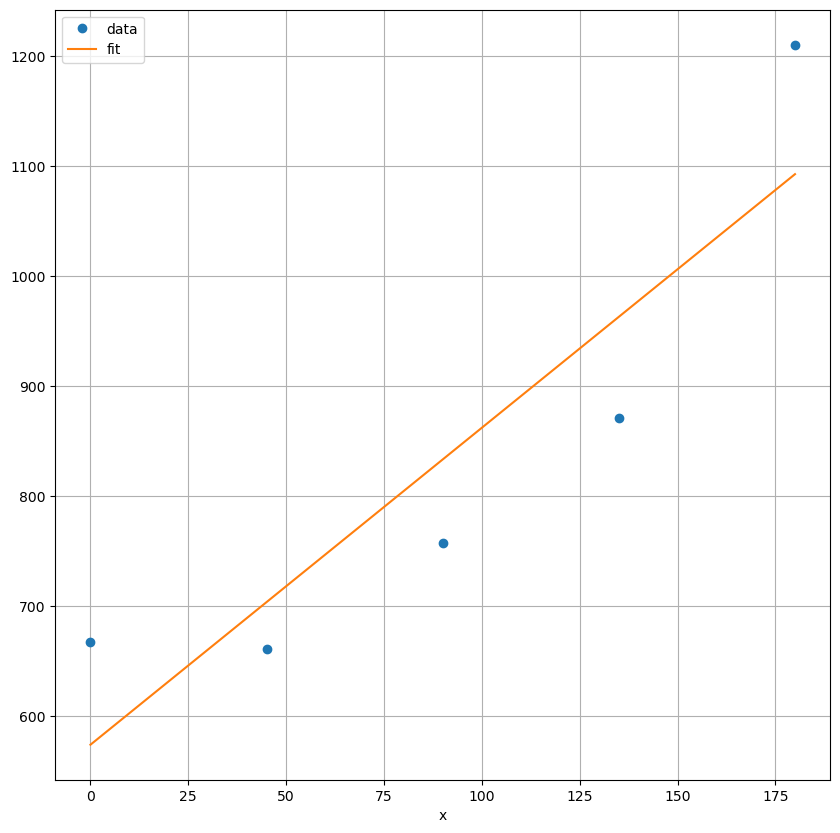

In [58]:
m = ca.SX.sym('m')
c = ca.SX.sym('c')

obj = 0
for i in range(len(x)):
    obj += (y[i] - (m*x[i] + c))**2

g = []
p = []

OPT_variables = ca.horzcat(m,c)
nlprob = {'f': obj, 'x': OPT_variables, 'g': g, 'p': p}

opt = {
    'ipopt': 
    {
        'max_iter': 1000, 
        'print_level': 0, 
        'acceptable_tol': 1e-8, 
        'acceptable_obj_change_tol': 1e-6}, 
        'print_time': 0
}

lbx = ca.DM.zeros((2, 1))
ubx = ca.DM.zeros((2, 1))
lbg = ca.DM.zeros((1, 1))
ubg = ca.DM.zeros((1, 1))

lbx[0] = -ca.inf
ubx[0] = ca.inf
lbx[1] = -ca.inf
ubx[1] = ca.inf
lbg[0] = -ca.inf
ubg[0] = ca.inf

p = []
x0 = [0.5,1]

sol = ca.nlpsol('solver', 'ipopt', nlprob, opt)
sol = sol(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

import numpy as np
x_line = np.linspace(0,180,100)
y_line = x_sol[0]*x_line + x_sol[1]

plt.figure()
plt.plot(x,y,'o',label='data',linewidth=line_width)
plt.plot(x_line,y_line,label='fit',linewidth=line_width)
plt.legend()
plt.grid()
plt.xlabel('x')

# Objective Visualization

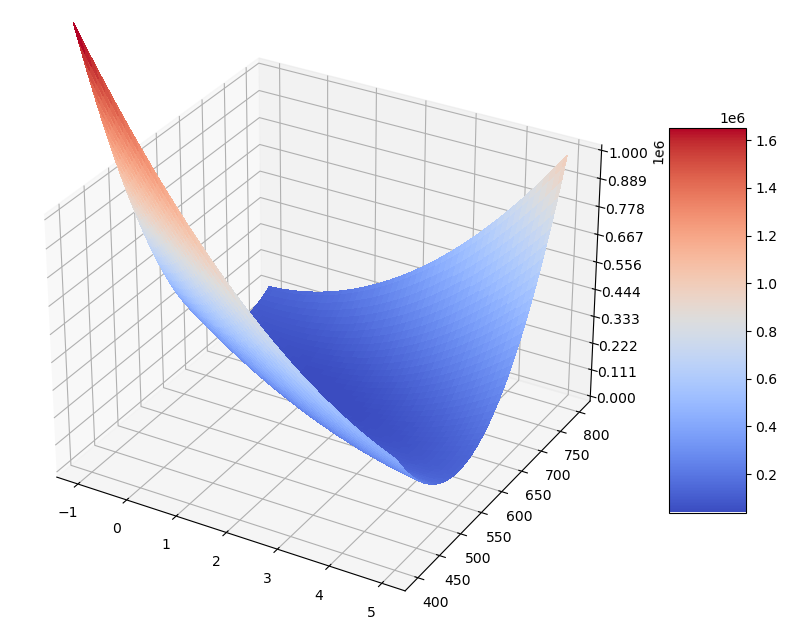

In [59]:
obj_fun = ca.Function('obj_fun', [m,c], [obj])

x_range = np.linspace(-1,5,100)
y_range = np.linspace(400,800,100)

X,Y = np.meshgrid(x_range,y_range)
Z = np.zeros((len(x_range),len(y_range)))

for i in range(len(x_range)):
    for j in range(len(y_range)):
        Z[i,j] = obj_fun(x_range[i],y_range[j])

from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Plot the surface.
# set the plot size
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1e6)
ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
